> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset - [Dataset-name]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected/downloaded for analysis. Read through the description available on the homepage-links present [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). List all column names in each table, and their significance. In case of multiple tables, describe the relationship between tables. 

For my Analysis I will be using the TMDb movie dataset. This data set contains information about approxiamaly 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue..

#### The TMDB Dataset contains the following columns:-

* id - A unique identifier for each movie.
* imdb_id - A unique identifier for each movie on IMDB.
* cast - The name of lead and supporting actors.
* director - the director of the movie
* budget - The budget in which the movie was made.
* genre - The genre of the movie, Action, Comedy ,Thriller etc.
* homepage - A link to the homepage of the movie.
* id - This is infact the movie_id as in the first dataset.
* keywords - The keywords or tags related to the movie.
* original_title - The title of the movie before translation or adaptation.
* overview - A brief description of the movie.
* popularity - A numeric quantity specifying the movie popularity.
* production_companies - The production house of the movie.
* production_countries - The country in which it was produced.
* release_date - The date on which it was released.
* revenue - The worldwide revenue generated by the movie.
* runtime - The running time of the movie in minutes.
* tagline - Movie's tagline.
* vote_average - average ratings the movie recieved.
* budget_adj - shows the budget associated movie in terms of 2010 dollars.
* revenue_adj - shows the revenue associated movie in terms of 2010 dollars.
#### The DataSet consists of:
  *   10866 Rows &, 
  *   21 Columns


### Question(s) for Analysis
>**Tip**: Clearly state one or more questions that you plan on exploring over the course of the report. You will address these questions in the **data analysis** and **conclusion** sections. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> **Tip**: Once you start coding, use NumPy arrays, Pandas Series, and DataFrames where appropriate rather than Python lists and dictionaries. Also, **use good coding practices**, such as, define and use functions to avoid repetitive code. Use appropriate comments within the code cells, explanation in the mark-down cells, and meaningful variable names. 

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
% matplotlib inline


In [2]:
# Upgrade pandas to use dataframe.explode() function. 
# Restart your kernel after this step else you will not be able to inspect the columns with head()
%load_ext autoreload
%autoreload 2
!pip install --upgrade pandas==0.25.0
!pip install -U seaborn   # Seaborn provide some nice features for graph and plot visualizations

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)
Requirement already up-to-date: seaborn in /opt/conda/lib/python3.6/site-packages (0.11.2)


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
tmdb_df = pd.read_csv('Database_TMDb_movie_data/tmdb-movies.csv')
tmdb_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# get the dataframe info
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> From the above snippets we can see that there are some of the columns information is not very analysis friendly, and some of the datatypes used on some of the columns might also cause some issues when applying the analysis steps

* #####   'id', 'imdb_id' columns have almost the same number of rows, with exception of 10 missing values from imdb_id. Since, imdb_id does not add vallue to the dataset and contains missing values, I am dropping it.

* ##### 'popularity', 'budget', and 'revenue' columns are useful for this analysis and will be used to check for correlation later in the analysis.

* ##### 'original_title', 'cast', 'director' contains usefull information that will be used for analysis later in the dataset.

* ##### 'homepage', 'tagline', 'keywords', 'overview', 'vote_average', 'budget_adj', 'revenue_adj' does not seem to contain any usefull information that can be used in the analysis of the dataset, so it will be dropped to reduce some noise.

* ##### 'release_date', and 'release_year' columns are also important. release_date need to be converted DateTime object.

In [5]:
# List the number of rows with missing values
tmdb_df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

> From my observations I can see that there is a number of columns with missing informtion, but most of them will be dropped as documented in the above paragraph

In [6]:
# Check for Duplicate Values in Dataset
tmdb_df.duplicated().value_counts()

# List the duplicate Row
tmdb_df[tmdb_df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


> From the whole dataset we only found one duplicate row, that we will drop in a later stage.

In [7]:
# List the number of unique values
tmdb_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

#### During this phase I will try and resolve all the problems identified during the above analysis:-

*    Convert the datatype of release_date into a proper DateTime format.
*    Drop the identified duplicate rows.
*    Drop the rows which have missing values.
*    Drop the columns that was identified earlier during analysis
*    Checking that all columns are in the desired data type.

In [8]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.


In [9]:
# Convert release_date datatype to a proper date time format
tmdb_df['release_date'] = pd.to_datetime(tmdb_df['release_date'])
tmdb_df['release_date'].head()

0   2015-06-09
1   2015-05-13
2   2015-03-18
3   2015-12-15
4   2015-04-01
Name: release_date, dtype: datetime64[ns]

In [10]:
# Delete Duplicate Row
tmdb_df.drop(index=tmdb_df.index[2090], 
        axis=0, 
        inplace=True)

In [11]:
# Drop Columns that was identified earlier during initial analysis
tmdb_cols = [1, 7, 9, 10, 11, 19, 20]
tmdb_df.drop(tmdb_df.columns[tmdb_cols], axis=1, inplace=True)

> **axis**  = In pandas axis = 0 refers to horizontal axis or rows and axis = 1 refers to vertical axis or columns.

> **inplace** = Inplace is a parameter accepted by a number of pandas methods which affects the behaviour of how the method runs. inplace=True will make the change directly on the dataset meaning no reasigning is nedded, while inplace=False will make a copy of the dataframe but you the operation will not be permanent 

In [12]:
# Drop Rows with missing values
tmdb_df.dropna(how = 'any',inplace = True)

> **how** = Determine if row or column is removed from DataFrame, when we have at least one NA or all NA.
* _**'any'**_ : If any NA values are present, drop that row or column.
* _**'all'**_ : If all values are NA, drop that row or column.

In [13]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 14 columns):
id                      9772 non-null int64
popularity              9772 non-null float64
budget                  9772 non-null int64
revenue                 9772 non-null int64
original_title          9772 non-null object
cast                    9772 non-null object
director                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null datetime64[ns]
vote_count              9772 non-null int64
vote_average            9772 non-null float64
release_year            9772 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 1.1+ MB


> From the above extract we can now see tht all null values were removed, datatypes were fixed, unused columns were also dropped, that adds no value to our analysis

In [14]:
tmdb_df.duplicated().value_counts()

False    9772
dtype: int64

> We also deleted the duplicate value found during our preliminary investigation

In [15]:
tmdb_df[(tmdb_df.release_year == 1966)]

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
10820,13377,1.227582,315000,0,How the Grinch Stole Christmas!,Boris Karloff|June Foray|Thurl Ravenscroft|Dal...,Chuck Jones|Ben Washam,26,Animation|Family|Comedy,MGM Television|The Cat in the Hat Productions,2066-12-18,286,7.1,1966
10821,1714,0.929393,0,0,Fahrenheit 451,Oskar Werner|Julie Christie|Cyril Cusack|Bee D...,FranÃ§ois Truffaut,112,Drama|Science Fiction,Anglo Enterprises|Vineyard Film Ltd.,2066-09-06,93,6.8,1966
10822,396,0.670274,7500000,33736689,Who's Afraid of Virginia Woolf?,Elizabeth Taylor|Richard Burton|George Segal|S...,Mike Nichols,131,Drama,Chenault Productions,2066-06-21,74,7.5,1966
10823,3591,0.613444,0,0,One Million Years B.C.,Raquel Welch|John Richardson|Percy Herbert|Rob...,Don Chaffey,100,Action|Adventure|Fantasy,Hammer Film Productions,2066-12-30,17,5.6,1966
10824,2525,0.533292,18000000,0,The Bible: In the Beginning...,Michael Parks|Ulla Bergryd|Richard Harris|Fran...,John Huston,174,Drama,Seven Arts Productions|Dino de Laurentiis Cine...,2066-09-28,18,5.8,1966
10825,1052,0.509263,0,0,Blow-Up,David Hemmings|Vanessa Redgrave|Sarah Miles|Jo...,Michelangelo Antonioni,111,Drama|Mystery|Thriller,Bridge Films|Metro-Goldwyn-Mayer (MGM)|Carlo P...,2066-12-18,103,6.8,1966
10826,874,0.418900,0,0,A Man for All Seasons,Paul Scofield|Wendy Hiller|Leo McKern|Robert S...,Fred Zinnemann,120,Drama|History,Highland Films,2066-12-12,29,6.3,1966
10827,2661,0.410366,1377800,0,Batman,Adam West|Burt Ward|Cesar Romero|Burgess Mered...,Leslie H. Martinson,105,Family|Adventure|Comedy|Science Fiction|Crime,Twentieth Century Fox Film Corporation|DC Comi...,2066-07-30,99,5.9,1966
10828,5780,0.402730,3000000,13000000,Torn Curtain,Paul Newman|Julie Andrews|Lila Kedrova|HansjÃ¶...,Alfred Hitchcock,128,Mystery|Thriller,Universal Pictures,2066-07-13,46,6.3,1966
10829,6644,0.395668,4653000,6000000,El Dorado,John Wayne|Robert Mitchum|James Caan|Charlene ...,Howard Hawks,120,Action|Western,Paramount Pictures|Laurel Productions,2066-12-17,36,6.9,1966


In [16]:
tmdb_df = tmdb_df[tmdb_df.release_year != 1966]

In [17]:
tmdb_df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


> On further inspection I noticed that some movies have 0 budget and 0 revenue and that sometimes the release_year does not coincide with the year in the release_date, I dropped it in the previous step

In [18]:
# Add a profit column to the dataframe for later analysis

tmdb_df['profit']=tmdb_df['revenue']-tmdb_df['budget']
tmdb_df.head(10)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1316249360
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,2015-12-25,3929,7.2,2015,397950503
6,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,2015-06-23,2598,5.8,2015,285603537
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,2015-09-30,4572,7.6,2015,487380321
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,2015-06-17,2893,6.5,2015,1082730962
9,150540,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,2015-06-09,3935,8.0,2015,678708609


In [19]:
tmdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9728 entries, 0 to 10819
Data columns (total 15 columns):
id                      9728 non-null int64
popularity              9728 non-null float64
budget                  9728 non-null int64
revenue                 9728 non-null int64
original_title          9728 non-null object
cast                    9728 non-null object
director                9728 non-null object
runtime                 9728 non-null int64
genres                  9728 non-null object
production_companies    9728 non-null object
release_date            9728 non-null datetime64[ns]
vote_count              9728 non-null int64
vote_average            9728 non-null float64
release_year            9728 non-null int64
profit                  9728 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(7), object(5)
memory usage: 1.2+ MB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (Which Actor/Actress appeared in the most movies?)

In [20]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
cast_count = pd.Series(tmdb_df['cast'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
cast_count.head(20)

Robert De Niro        72
Samuel L. Jackson     70
Bruce Willis          62
Nicolas Cage          61
Robin Williams        51
Michael Caine         50
Morgan Freeman        49
John Goodman          48
John Cusack           48
Susan Sarandon        47
Liam Neeson           47
Alec Baldwin          47
Tom Hanks             46
Julianne Moore        46
Gene Hackman          45
Dennis Quaid          45
Sylvester Stallone    44
Meryl Streep          44
Willem Dafoe          44
Johnny Depp           43
dtype: int64

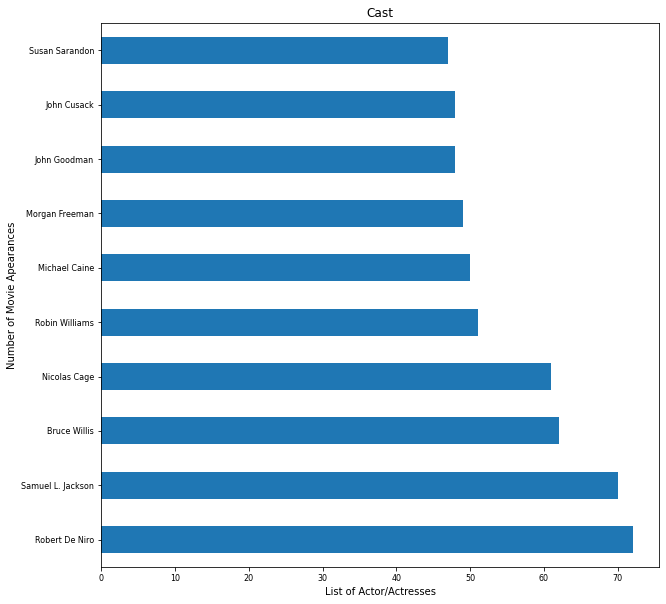

In [21]:
# Initialize the plot
diagram = cast_count.head(10).plot(kind='barh', fontsize = 8, figsize = (10,10))
# Set a title
diagram.set(title = 'Cast')
# x-label and y-label
diagram.set_ylabel('Number of Movie Apearances')
diagram.set_xlabel('List of Actor/Actresses')
# Show the plot
plt.show()

### Research Question 2 (Which genres are more popular?)

In [22]:
genre_count = pd.Series(tmdb_df['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
genre_count.head(10)

Drama              4349
Comedy             3418
Thriller           2738
Action             2221
Romance            1565
Horror             1523
Adventure          1373
Crime              1294
Science Fiction    1130
Family             1089
dtype: int64

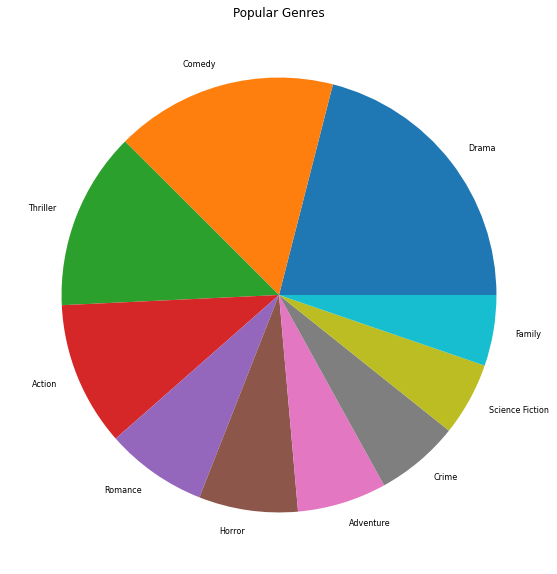

In [23]:
# Initialize the plot
diagram = genre_count.head(10).plot(kind='pie', fontsize = 8, figsize = (10,10))
# Give your diagram a title
diagram.set(title = 'Popular Genres')
# x-label and y-label
diagram.set_ylabel('')
diagram.set_xlabel('')
# Show the plot
plt.show()

### Research Question 3 (Does higher budget movies always make more profits?)

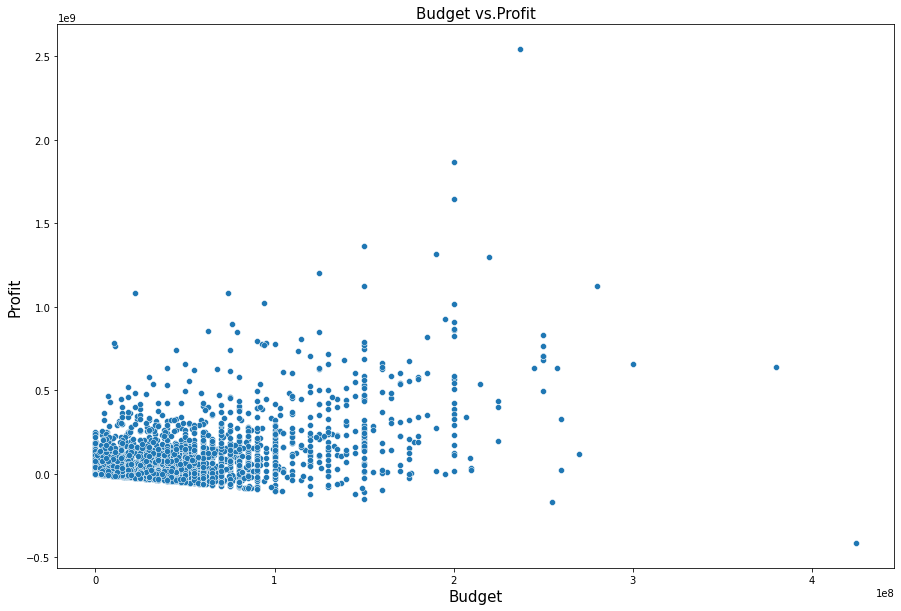

In [24]:
#looking for correlation beteen profit and budget
#https://www.w3schools.com/python/ref_string_format.asp
#https://www.tutorialspoint.com/how-to-have-a-function-return-a-figure-in-python-using-matplotlib

#function to reuse scatterplot

def scatterplot(x,y,order):
    df=tmdb_df
    fig=plt.figure(figsize = (15,10))
    plot=sns.scatterplot(y=y,x=x,data=df)
    title=plt.title ("{} vs.{}".format(x.capitalize(),y.capitalize()), fontsize=15) #.capitalize makes the first letter a capital letter
    ylabel=plt.ylabel("{}".format(y).capitalize(), fontsize=15)
    xlabel=plt.xlabel("{}".format(x).capitalize(), fontsize=15)
    return df,fig,plot,title,ylabel,xlabel

scatterplot("budget","profit", False)
plt.show()

> There is no correlation between budget and profit. So we cannot conclusively say that high budget movies fare better at the box office then lower budget movies

### Research Question 4 (Does higher votes always mean movies are more popular?)

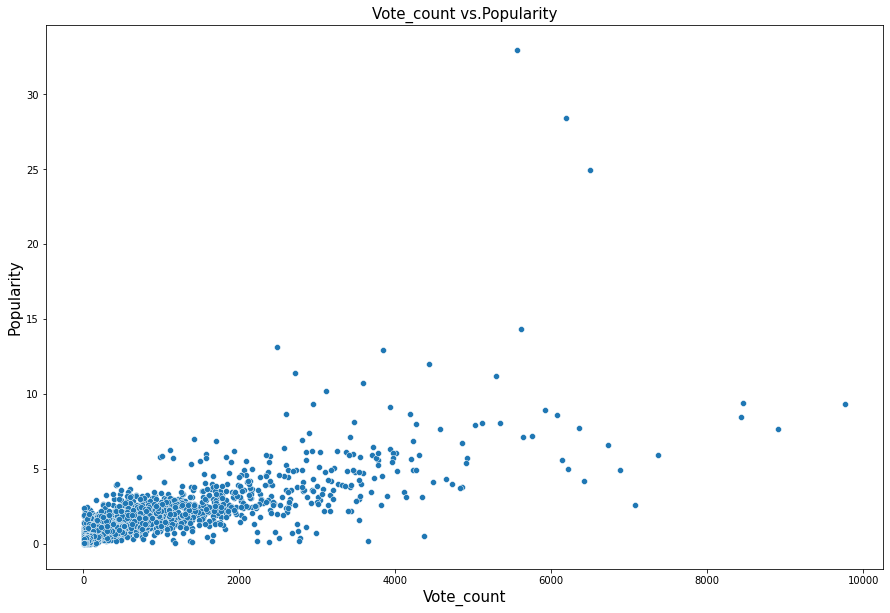

In [25]:
#looking for correlation beteen vote_count and popularity
scatterplot("vote_count","popularity", False)
plt.show()

> There is a positive correlation between votes and popularity, with some few outliers that can clearly identify on the scatter plot. So we can conclusively say that the number of votes can be used as an indicator for popularity

### Research Question 5 (Does the number of genres always gaurantee higher profits?)

In [26]:
tmdb_df_genres = tmdb_df.assign(genres=tmdb_df['genres'].str.split('|')).explode('genres') #https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows

In [27]:
tmdb_df_genres = tmdb_df_genres.copy().groupby('genres', as_index =False).sum()
tmdb_df_genres.drop(['id', 'popularity', 'budget', 'revenue', 'runtime',
       'vote_count', 'vote_average', 'release_year'], axis =1, inplace =True)

In [28]:
tmdb_df_genres = tmdb_df_genres.sort_values('profit', ascending =False)

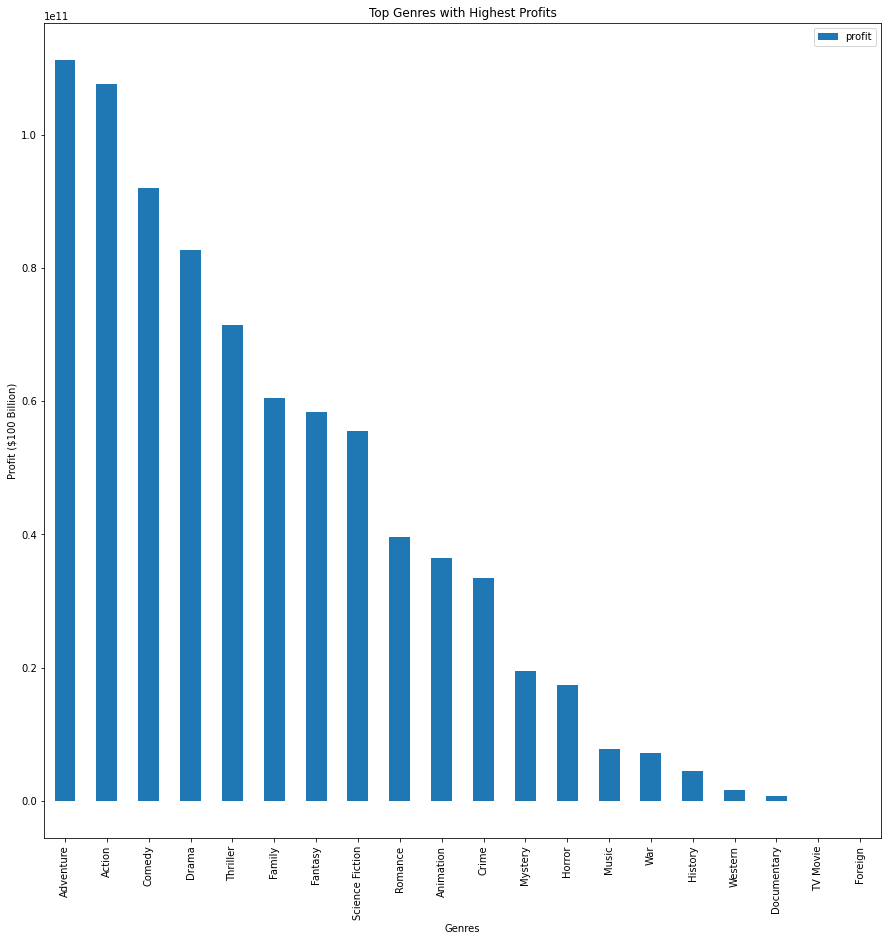

In [29]:
tmdb_df_genres.plot.bar(x = 'genres', y = 'profit', figsize = (15, 15))
plt.xlabel ('Genres')
plt.ylabel ('Profit ($100 Billion)')
plt.title ('Top Genres with Highest Profits')
plt.show()

> Just because a genre apeares more does not necesarrily mean that the combined profit will be more then lower number of genresthe number of drama ans action classifications, we see that even though Drama is 4349 and action is 2221 drama is outperformed by action genres 

#### Conclusions
By looking at the data and trying to make inferences without proper evidence will always make you observe biased predictions based on your perceptions. by following the Data Analysis process I was able to clean the dataset to a usuable dataset that I could use in my EDA.

> During my EDA phase I was able to build evidence to prove certian questions that I tried to answer without proper insights.
I was able to prove correlations between some features and also prove that eventhough the number of genres are bigger does not mean that it will produce more profit then one with less number of genres

#### Limitations
I have used the TMDB movie dataset for this analysis. This dataset is only a subset ot the total movies, furthermore alot of information had to be dropped because of missing values and null values, there were also instances were there were clear mistyped information especially between release_date and release_year.

In [30]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0